### Reminder:  Clear output before saving for commit.
otherwise merging will suck.

Molly and Alyssa will mostly work in this file

Main project requirements:
  * few plots per question 2 per question 6-8 plots in total
  * heading for each q and summary of findings under q
  * at least 1 linear regression on at least Q4.
  


In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import seaborn as sns 

In [2]:
file_path = 'Data/database.csv'
df = pd.read_csv(file_path, low_memory=False)  #low memory imput to avoid warning message
# df.info()
# column notes:
# Species Quantity values: '1', '2-10', nan, '11-100', 'Over 100' 

In [3]:
subset_df = df[["Incident Year","Incident Month","Airport","Airport ID", "State","Aircraft","Aircraft Type", "Flight Phase", "Species Name","Species ID","Species Quantity"]]
subset_df.to_csv("Data/data_subset.csv")


# Which bird is the most dangerous 1990-2014?

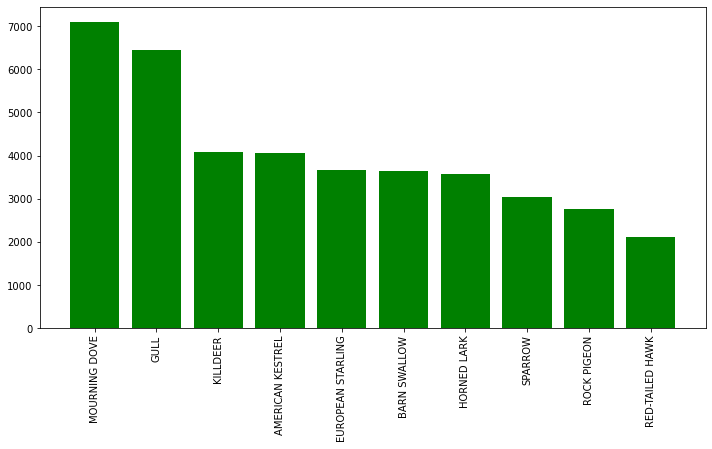

In [4]:
#removing "unknown" bird species, removing partial year data for 2015
birdType_df = subset_df[["Species Name","Species ID","Species Quantity"]].loc[(subset_df["Species Name"]!= "UNKNOWN MEDIUM BIRD") & (subset_df["Species Name"]!= "UNKNOWN SMALL BIRD") 
                                                                              & (subset_df["Species Name"]!= "UNKNOWN LARGE BIRD") & (subset_df["Species Name"]!= "UNKNOWN BIRD")
                                                                              & (subset_df["Incident Year"]!= 2015)]


# todo add labels, pretty up.  add thoughts on results
birdCounts = birdType_df["Species Name"].value_counts()

y_axis = birdCounts[:10]  
x_axis = birdCounts.index[:10]

plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis, color = "green")
plt.tight_layout()  
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,birdCounts.index[:10], rotation="vertical")

plt.show()


#### Which airport or geographic area is more likely to have a bird/plane strike?
    * get fancy add google figure w/heat map possibly
    * Graph for states, or stacked one of all airports grouped by state


In [5]:
subset_df

,Incident Year,Incident Month,Airport,Airport ID,State,Aircraft,Aircraft Type,Flight Phase,Species Name,Species ID,Species Quantity
0,1990,1,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KCVG,KY,B-757-200,A,CLIMB,GULL,NE1,1
1,1990,1,LIHUE ARPT,PHLI,HI,DC-9,A,TAKEOFF RUN,HOUSE SPARROW,ZZ201,1
2,1990,1,LIHUE ARPT,PHLI,HI,UNKNOWN,NaN,NaN,BARN OWL,R1101,1
3,1990,1,MYRTLE BEACH INTL,KMYR,SC,A-10A,A,APPROACH,UNKNOWN MEDIUM BIRD,UNKBM,1
4,1990,1,JACKSONVILLE INTL,KJAX,FL,F-16,A,CLIMB,FINCH,ZX,1
...,...,...,...,...,...,...,...,...,...,...,...
174099,2015,9,NaN,UNKN,NaN,B-737-700,A,NaN,UNKNOWN SMALL BIRD,UNKBS,1
174100,2015,9,DALLAS LOVE FIELD ARPT,KDAL,TX,B-737-700,A,APPROACH,UNKNOWN SMALL BIRD,UNKBS,1
174101,2015,9,MIAMI INTL,KMIA,FL,CITATIONJET,A,CLIMB,TURKEY VULTURE,K1002,1
174102,2015,9,PORTLAND INTL (OR),KPDX,OR,DHC8 DASH 8,A,DESCENT,HERMIT THRUSH,Z6014,1


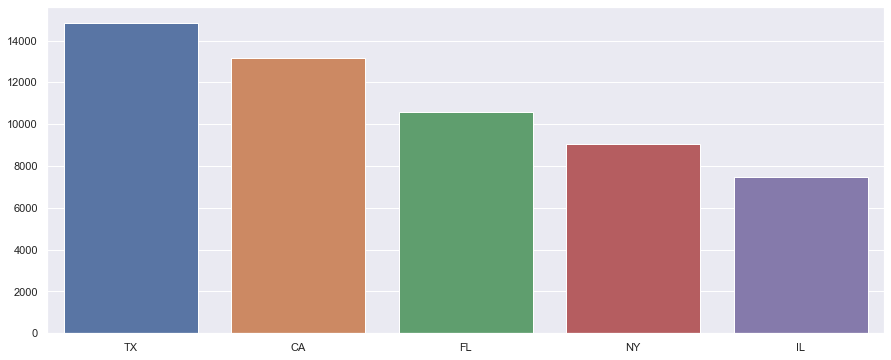

In [30]:
# Jag's \/\/\/
subset_df["State"].value_counts().head(10)

# Get the numnber of occurances of each state
state_counts = df.State.value_counts()

# Split and Save the state names in a variable
states = state_counts.index

# Split and Save the counts in another variable
counts = state_counts.values

# Create barplot object
barplot = sns.barplot(x=states, y=counts)

sns.set(rc={'figure.figsize':(15,6)})
barplot = sns.barplot(x=states[:5], y=counts[:5])



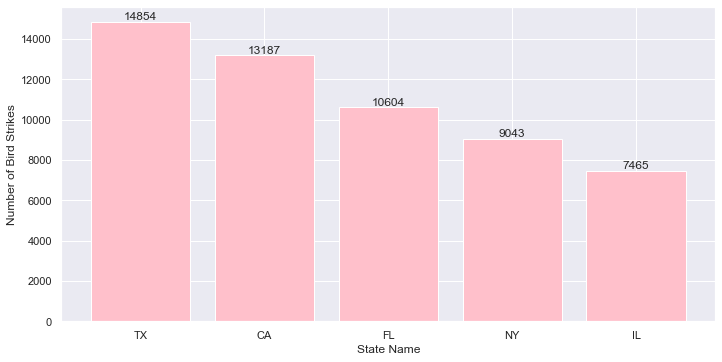

In [29]:
# Jag's ^^^




# todo add labels, pretty up.  add thoughts on results
stateCounts = subset_df["State"].value_counts()
stateCounts

y_axis = stateCounts[:5]  
x_axis = stateCounts.index[:5]

plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis, color = "pink")
plt.tight_layout()  
plt.xlabel('State Name')
plt.ylabel("Number of Bird Strikes")
 

for i in range(len(y_axis)):
    plt.annotate(str(y_axis[i]), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')


plt.show()


In [8]:
# Molly \/\/\/

In [9]:
# Molly ^^^

In [10]:
# Selom \/\/\/

In [11]:
# Selom ^^^

In [12]:
# Alyssa  \/\/\/

In [13]:
# Alyssa ^^^